DSP Basics - Prof Ryan Robucci  - This notebook introduces some basic code processes required in the field of DSP 

A good reference for getting started with numpy and ploting
https://www.labri.fr/perso/nrougier/teaching/matplotlib/

(This is a documentation cell, note I can use latex: $\omega$)

The cell below contains the function zplane which is not commonly included with python packages

To use it your own code you can download the file
* https://bitbucket.org/cfelton/examples/raw/f3383e14f18a57852e17c10ee4cd316fbfafbf85/snippets/zplane/plot_zplane.py

Then use the following import in your pyton code:
* from plot_zplane import zplane 




In [8]:
#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.
#
# 2017/03/04 Ryan Robucci - changed plot raduis to expand to 10% beyond largest root real/imag component and and manage ticks

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    #RWR: the following has been modified to fit larger-magnitude roots and manage ticks
    r = 1.1*max(1.5/1.1,np.abs(np.concatenate((p.real,p.imag,z.real,z.imag))).max()); 
    plt.axis('scaled')
    if r<1.6:
        ticks = [-1, -.5, .5, 1]; 
    elif r<5:
        ticks = [-2,-1, -.5, .5, 1,2]; 
    elif r<10:
        ticks = [-5,-2,-1,1,2,5]; 
    elif r<20:
        ticks = [-10,-1,1,10]; 
    else:
        rlog = np.ceil(np.log10(r))
        ticks = np.arange(-(10**rlog),(10**rlog)+1,10**(rlog-1)*2); 
    
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.axis([-r, r, -r, r])

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

$\mathcal{Z}^{-1}\big\{1+z^-1+z^-2+z^-3\big\}= \delta[n]+ 2\delta[n-1] + 2\delta[n-2] + \delta[n-3]$

In [9]:
import numpy as np
#             z^-2 + 0.618z^-1+1 
# H(z)=  --------------------
#          2.618
b = np.array([1,0.618,1])
b=b/sum(b)
a = np.array([1,0,-0.007])
a=a/sum(a)

In [10]:
from scipy import signal #https://docs.scipy.org/doc/scipy-0.18.1/reference/signal.html
[z,p,g] = signal.tf2zpk(b, a)
print('P:',p)
print('Z:',z)
print('G:',g)
[b,a] = signal.zpk2tf(z, p*10, g)
print('b:',b)
print('a:',a)

P: [-0.083666  0.083666]
Z: [-0.309+0.95106204j -0.309-0.95106204j]
G: 0.3792971734148205
b: [0.37929717 0.23440565 0.37929717]
a: [ 1.   0.  -0.7]


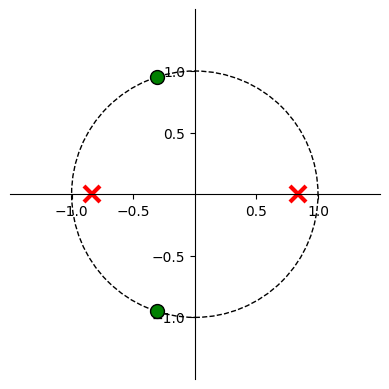

In [11]:
zplane(b,a)
plt.show()

In [12]:
w, H = signal.freqz(b,a)
fs=200
ww=(fs*w)/(2*np.pi)

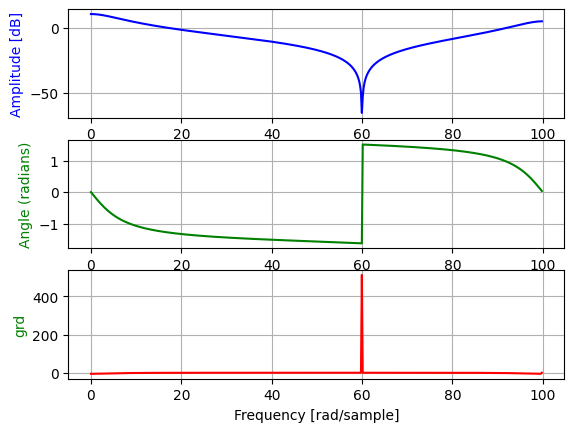

In [13]:
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(ww, 20 * np.log10(np.abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.subplot(312)
angles = np.unwrap(np.angle(H))
plt.plot(ww, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')

plt.subplot(313)
grd = np.diff(angles)/np.diff(w)
grd_temp=np.append(grd,0)
plt.plot(ww, grd_temp, 'r')
plt.ylabel('grd', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid(True)
plt.axis('tight')
plt.show()

In [14]:
ecg = np.genfromtxt('ecg2x60.dat')

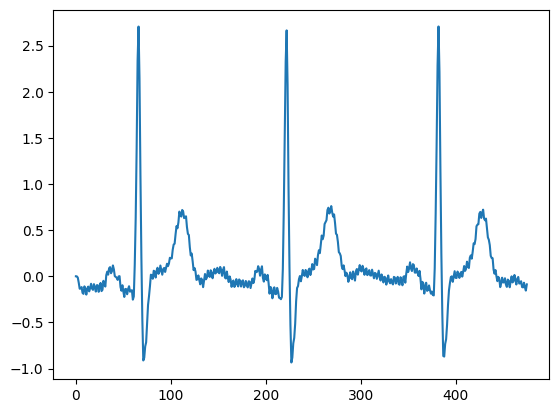

In [15]:
plt.plot(ecg)

Note the "group" or "range" of freqeuncies with a localized, generalized linear delay

What group delay does it correspond to? 

In [16]:
filtered_ecg = signal.lfilter(b,a,ecg)

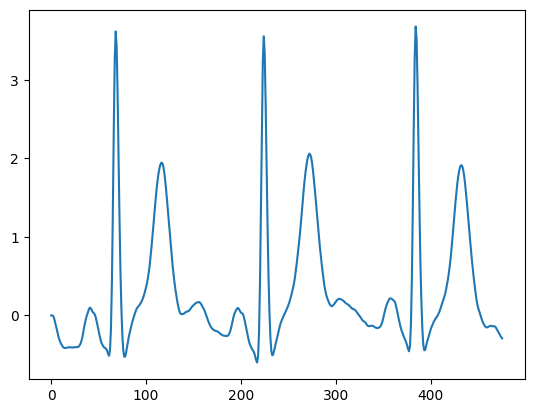

In [17]:
plt.plot(filtered_ecg)

In [18]:
import numpy as np
S = np.fft.fft(ecg) # https://docs.scipy.org/doc/numpy/reference/routines.fft.html
Y = np.fft.fft(filtered_ecg)

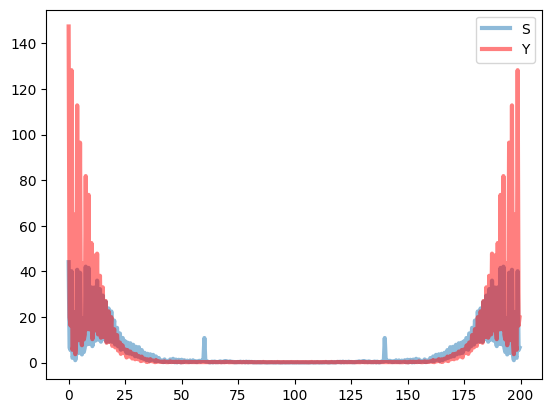

In [19]:
dF = fs/476; 
f = np.arange(-fs/2,(fs/2),dF); 
plt.plot(f+fs/2,np.abs(S), label = 'S',linewidth=3,alpha=.5) # in matlab extra arguments are 'DisplayName','S'
plt.plot(f+fs/2,np.abs(Y), label = 'Y',linewidth=3,alpha=.5,color='r')
plt.legend()
plt.axis('tight')
plt.show()

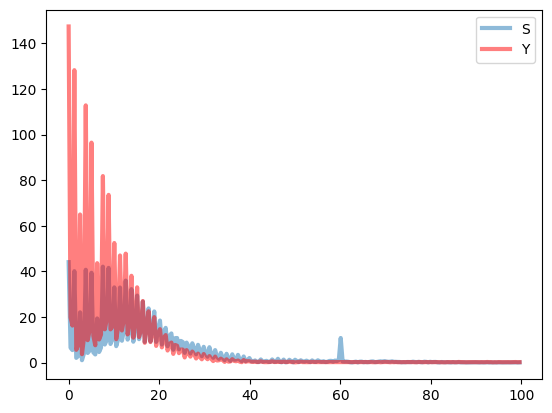

In [20]:
omega = 2 * np.pi * np.arange(len(S))/len(S)
omega=(omega*fs)/(2 * np.pi)
plt.plot(omega[0:int(476/2)],np.abs(S[0:int(476/2)]), label = 'S',linewidth=3,alpha=.5) # in matlab extra arguments are 'DisplayName','S'
plt.plot(omega[0:int(476/2)],np.abs(Y[0:int(476/2)]), label = 'Y',linewidth=3,alpha=.5,color='r')
plt.legend()
plt.axis('tight')
plt.show()

In [21]:
Eecg=np.sum(ecg**2)
Eecg

94.49460053477425

In [22]:
Efiltecg=np.sum(filtered_ecg**2)
Efiltecg

359.3654782497026

In [23]:
snr=np.log(Eecg/Efiltecg)

In [24]:
snr

-1.3357972202262836

Next, we rerun the magnitude plot earlier to verify that the gain at the input frequency is a little above $4\times$ 

We expect a 1.5 sample group delay, based on the center of mass of the impulse response or the derivative of the phase response 